In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots

In [2]:
param = CharmmParameterSet('top_all36_cgenff.rtf', '../data/charmm_ff/par_all36_cgenff.prm')
structure = 'butane.psf'
scan = 'butane_scan_b3lyp_4.log'

In [3]:
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param.bond_types[('CG331', 'CG321')].k=0
param.bond_types[('CG321', 'CG321')].k=0
param.bond_types[('CG331', 'HGA3')].k=0
param.bond_types[('CG321', 'HGA2')].k=0
param.angle_types[('CG331', 'CG321', 'CG321')].k=0
param.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param.angle_types[('HGA2', 'CG321', 'CG321')].k=0

In [4]:
butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

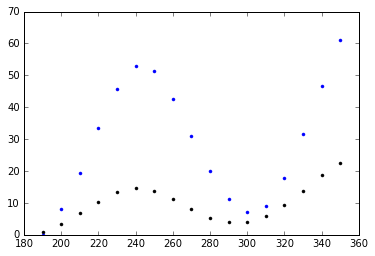

In [5]:
plt.plot(butane_scan.steps, butane_scan.qm_energy, 'k.')
plt.plot(butane_scan.steps, butane_scan.mm_energy, '.')

In [6]:
platform = mm.Platform.getPlatformByName('Reference')
param_to_opt = [('CG331', 'CG321', 'CG321', 'CG331'),
                ('HGA3', 'CG331', 'CG321', 'HGA2'),
                ('HGA3', 'CG331', 'CG321', 'CG321'),
                ('HGA2', 'CG321', 'CG321', 'HGA2'),
                ('CG331', 'CG321', 'CG321', 'HGA2')]

In [7]:
model = Model.TorsionFitModelEliminatePhase(param, butane_scan, platform=platform, 
                                            param_to_opt=param_to_opt)

In [8]:
sampler = MCMC(model.pymc_parameters, db=sqlite_plus, dbname='butane_param_0_all.database', verbose=5)

In [9]:
sampler.sample(10000)

Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_1_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_HGA2_2_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_HGA2_1_K
Assigning step method Metropolis to stochastic HGA3_CG331_CG321_HGA2_2_K
Assigning step method Metropolis to stochastic HGA3_CG331_CG321_HGA2_3_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_HGA2_3_K
Assigning step method Metropolis to stochastic HGA2_CG321_CG321_HGA2_2_K
Assigning step method Metropolis to stochastic HGA3_CG331_CG321_CG321_4_K
Assigning step method Metropolis to stochastic BUTA1_offset
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_6_K
Assigning step method Metropolis to stochastic HGA3_CG331_CG321_CG321_2_K
Assigning step method Metropolis to stochastic HGA2_CG321_CG321_HGA2_6_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_3_K
Assigning step method Metropolis to stochastic CG331_

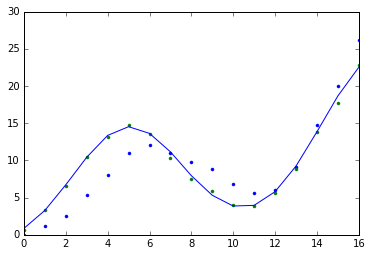

In [10]:
plt.plot(sampler.trace('mm_energy')[0], 'b.')
plt.plot(butane_scan.mm_energy, 'g.')
plt.plot(butane_scan.qm_energy)

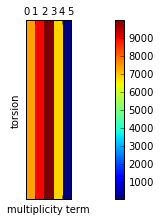

In [12]:
plots.marg_mult(model, sampler, 10000, 0, 'multiplicity.png')

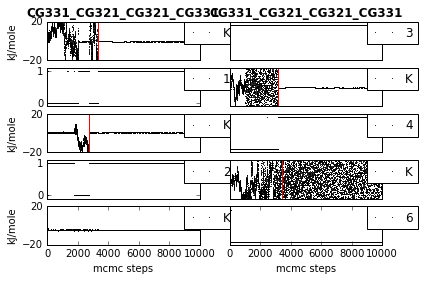

In [13]:
plots.trace_no_phase('CG331_CG321_CG321_CG331', sampler, markersize=1.0)

(array([  180.,   192.,   178.,   172.,  7639.,   244.,   319.,   339.,
          330.,   407.]),
 array([ -1.99611650e+01,  -1.59679103e+01,  -1.19746556e+01,
         -7.98140090e+00,  -3.98814620e+00,   5.10850000e-03,
          3.99836320e+00,   7.99161790e+00,   1.19848726e+01,
          1.59781273e+01,   1.99713820e+01]),
 <a list of 10 Patch objects>)

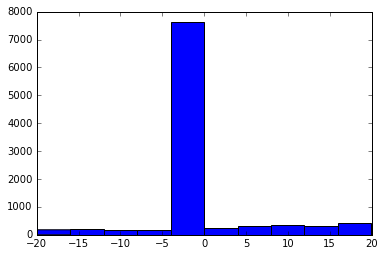

In [14]:
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_1_K')[:])

(array([  109.,   116.,   184.,   157.,   138.,    84.,  6689.,  2417.,
           59.,    47.]),
 array([-19.986345 , -17.0147224, -14.0430998, -11.0714772,  -8.0998546,
         -5.128232 ,  -2.1566094,   0.8150132,   3.7866358,   6.7582584,
          9.729881 ]),
 <a list of 10 Patch objects>)

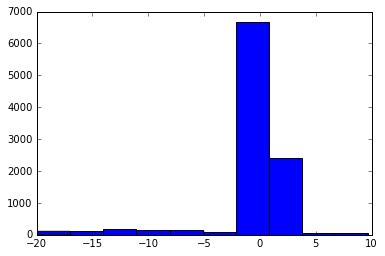

In [15]:
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_2_K')[:])

(array([  1.97000000e+02,   8.64800000e+03,   1.08700000e+03,
          4.40000000e+01,   8.00000000e+00,   2.00000000e+00,
          8.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          3.00000000e+00]),
 array([-5.405167 , -4.8853667, -4.3655664, -3.8457661, -3.3259658,
        -2.8061655, -2.2863652, -1.7665649, -1.2467646, -0.7269643,
        -0.207164 ]),
 <a list of 10 Patch objects>)

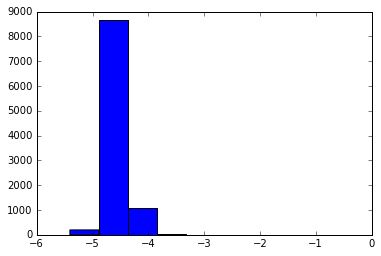

In [16]:
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_3_K')[:])

(array([  219.,   250.,   258.,   357.,  7318.,   475.,   338.,   314.,
          248.,   223.]),
 array([ -1.99929940e+01,  -1.59942221e+01,  -1.19954502e+01,
         -7.99667830e+00,  -3.99790640e+00,   8.65500000e-04,
          3.99963740e+00,   7.99840930e+00,   1.19971812e+01,
          1.59959531e+01,   1.99947250e+01]),
 <a list of 10 Patch objects>)

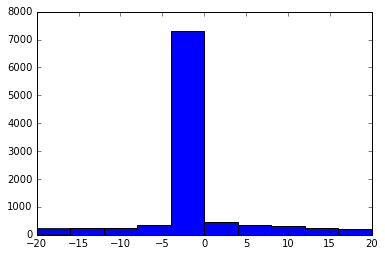

In [17]:
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_4_K')[:])

(array([ 1308.,  1114.,  1001.,  1069.,  1100.,  1075.,   907.,   797.,
          825.,   804.]),
 array([ -1.99949720e+01,  -1.59959523e+01,  -1.19969326e+01,
         -7.99791290e+00,  -3.99889320e+00,   1.26500000e-04,
          3.99914620e+00,   7.99816590e+00,   1.19971856e+01,
          1.59962053e+01,   1.99952250e+01]),
 <a list of 10 Patch objects>)

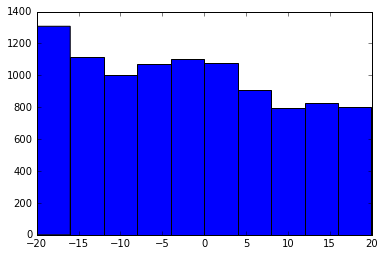

In [18]:
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_6_K')[:])